# Data Exploration of processed Data
Same notebook as 02.1, only with Phasenwinkel as input data
  
### 01 Handle Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("../data/processed/phasenwinkel_combined_2022-09-15_13-57-38.csv")
df.head()

5000.000000  5740.768000  6591.284000  7567.806000  8689.004000  \
0     4.129173     4.604181     5.106498     5.711708     6.416272   
1     3.570434     4.009670     4.326800     4.907792     5.488645   
2     2.491291     2.882523     3.138820     3.581841     4.006963   
3     4.581742     5.177500     5.747250     6.440863     7.148836   
4     3.415899     3.830793     4.247317     4.787162     5.322580   

   9976.312000  11454.338000  13151.340000  15099.759000  17336.843000  ...  \
0     7.162230      7.780563      8.519929      9.264882     10.001699  ...   
1     6.073893      6.613345      7.262221      7.861341      8.470069  ...   
2     4.423569      4.822635      5.299555      5.794243      6.318496  ...   
3     7.884008      8.586381      9.381247     10.183098     10.974585  ...   
4     5.882922      6.440433      7.101916      7.749960      8.351533  ...   

   2505936.168000  2877199.687000  3303467.240000  3792887.875000  \
0       -7.033245       -6.150090       -5.334007       -4.613265   
1       -5.935711       -5.207711       -4.533902       -3.967808   
2       -5.491214       -4.807160       -4.179360       -3.625097   
3       -7.772487       -6.905743       -6.102892       -5.379035   
4       -5.999431       -5.327220       -4.689790       -4.146025   

   4354817.950000  5000000.000000  Reihe_Sphaeroid  Nr_Reihe_Sphaeroid  \
0       -3.937669       -3.335516                R              10.csv   
1       -3.421033       -2.954402                R               2.csv   
2       -3.095748       -2.621535                R               8.csv   
3       -4.743840       -4.183140                R               6.csv   
4       -3.665002       -3.227378                R               3.csv   

   Zellinie   Exp  
0       T24  Exp1  
1       T24  Exp1  
2       T24  Exp1  
3       T24  Exp1  
4       T24  Exp1  

[5 rows x 55 columns]

In [10]:
# for convenient calculation we split the data in features and targets
df_features = df.iloc[:, 1:-4]
df_features.columns = df_features.columns.astype(float)
df_target = df["Zellinie"]
targets = df_target.unique()
print(targets)


['T24' 'MDA' 'T30']


### 02 EDA of processed Data
The goal is to understand how the data is distrubuted an how the impedance differs between different cell lines and experiments.
- Firstly, we take a look at some descriptive statistics
- Then, we investigate the correlation within a cell line of impedance 

In [11]:
stats_df = df.describe()

stats_df.columns = stats_df.columns.astype(float)
stats_df

5000.000     5740.768     6591.284     7567.806     8689.004     \
count   116.000000   116.000000   116.000000   116.000000   116.000000   
mean      2.190261     2.444810     2.744641     3.088417     3.454006   
std       1.504094     1.657968     1.825266     2.000646     2.207519   
min       0.226165     0.209797     0.292999     0.375352     0.453352   
25%       0.997226     1.201786     1.353982     1.601547     1.708313   
50%       1.999176     2.225134     2.552502     2.826829     3.209164   
75%       2.703064     3.042585     3.389792     3.790073     4.243454   
max       6.583506     7.309181     8.106248     8.846522     9.847753   

       9976.312     11454.338    13151.340    15099.759    17336.843    ...  \
count   116.000000   116.000000   116.000000   116.000000   116.000000  ...   
mean      3.840732     4.266150     4.735486     5.239142     5.730750  ...   
std       2.418220     2.618584     2.826702     3.027100     3.209845  ...   
min       0.488262     0.618207     0.727850     0.836629     0.923412  ...   
25%       1.931251     2.233670     2.473732     2.791692     3.211356  ...   
50%       3.544121     4.001145     4.526702     5.077391     5.628147  ...   
75%       4.790540     5.342824     5.993431     6.745550     7.393430  ...   
max      10.667151    11.634451    12.645223    13.560278    14.446086  ...   

       1442015.752  1655655.607  1900946.982  2182579.161  2505936.168  \
count   116.000000   116.000000   116.000000   116.000000   116.000000   
mean     -8.969792    -8.583850    -8.055944    -7.423324    -6.727780   
std       3.688899     3.547305     3.338598     3.081713     2.794871   
min     -16.712608   -15.887932   -14.790339   -13.540627   -12.229993   
25%     -11.663266   -11.309836   -10.703599    -9.863911    -8.974174   
50%      -9.901182    -9.040177    -8.435763    -7.863046    -7.064519   
75%      -5.687669    -5.451096    -5.073462    -4.657595    -4.204502   
max      -1.844666    -1.782426    -1.748415    -1.662921    -1.574733   

       2877199.687  3303467.240  3792887.875  4354817.950  5000000.000  
count   116.000000   116.000000   116.000000   116.000000   116.000000  
mean     -5.999599    -5.280784    -4.602882    -3.973509    -3.405859  
std       2.495685     2.205162     1.930717     1.697187     1.492416  
min     -10.894034    -9.625630    -8.475042    -7.399118    -6.505241  
25%      -7.992635    -7.042146    -6.159452    -5.339400    -4.604483  
50%      -6.301914    -5.513716    -4.741223    -4.069103    -3.513099  
75%      -3.748114    -3.262870    -2.808065    -2.289981    -1.899855  
max      -1.467986    -1.377186    -1.254081    -1.114564    -0.782752  

[8 rows x 51 columns]

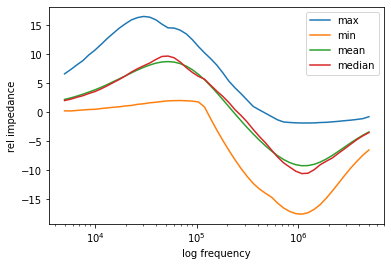

In [12]:
plt.plot(stats_df.T['max'], label='max')
plt.plot(stats_df.T['min'], label='min')
plt.plot(stats_df.T['mean'], label='mean')
plt.plot(stats_df.T['50%'], label='median')
plt.xscale('log')
plt.xlabel('log frequency')
plt.ylabel('rel impedance')
plt.legend()

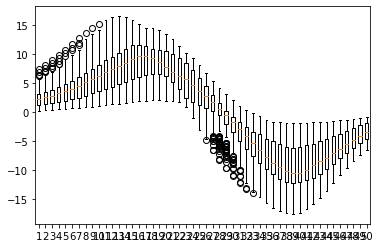

In [13]:
plt.boxplot(df_features)
plt.show()

### First Impression
The data looks plausible and from a first look it doesn't seem to be noisy or with extreme outlayers.
One can see a clear relation between the frequency and the relative impedance (even across all cell lines and experiments). Low freqencies lead to low impedance and high frequencies also lead to low impedance, whereas medium frequencies lead to high impedance

Next we'll look at the same plots for each celline

Text(0.5, 1.0, 'Mean Rel Impedance')

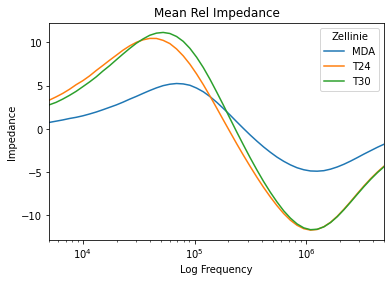

In [15]:

df_mean = df.groupby("Zellinie").mean()

df_mean.columns = df_mean.columns.astype(float)
ax=df_mean.T.plot(xlim=(df_mean.columns.min(), df_mean.columns.max()), logx=True, xlabel="Log Frequency", ylabel="Impedance")
ax.set_title('Mean Rel Impedance')

/tmp/ipykernel_338331/2098739072.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_max = df.groupby("Zellinie").max()


Text(0.5, 1.0, 'Max Rel. Impedance')

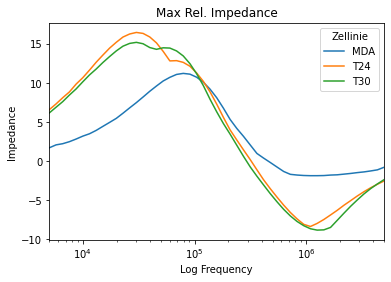

In [19]:

df_max = df.groupby("Zellinie").max()

del df_max['Nr_Reihe_Sphaeroid']

del df_max['Exp']
df_max.columns = df_max.columns.astype(float)
ax = df_max.T.plot(xlim=(df_max.columns.min(), df_max.columns.max()), logx=True, xlabel="Log Frequency", ylabel="Impedance")
ax.set_title('Max Rel. Impedance')

/tmp/ipykernel_338331/502040626.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df_min = df.groupby("Zellinie").min()


Text(0.5, 1.0, 'Min Rel. Impedance')

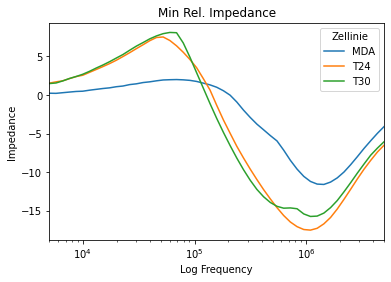

In [23]:
df_min = df.groupby("Zellinie").min()
del df_min['Nr_Reihe_Sphaeroid']
del df_min['Exp']
df_min.columns = df_min.columns.astype(float)
ax = df_min.T.plot(xlim=(df_min.columns.min(), df_min.columns.max()), logx=True, xlabel="Log Frequency", ylabel="Impedance")
ax.set_title('Min Rel. Impedance')

T24
MDA
T30


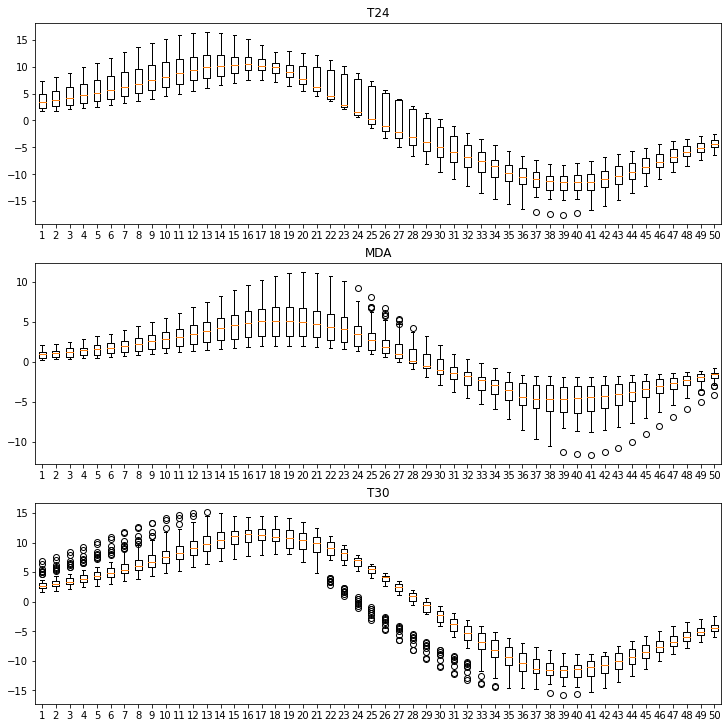

In [24]:
fig, ax = plt.subplots(3,1, figsize=(10,10), constrained_layout=True)
for i, target in enumerate(targets):
    print(target)
    ax[i].boxplot(df_features[df['Zellinie']==target])
    ax[i].set_title(target)

The figures for each cellline show that there is a difference in the frequency-impedance relation between the T celllines and the MDA cellline. However the differences between the T30 and T24 cellline are only marginal.

### Correlation within Celllines
To investigate how the relationship between frequency and relative impedance differs between different experiments inside one cell line, we look at the correlation between the impedance values relative to the frequencies

Text(0.5, 1.0, 'MDA Cellline')

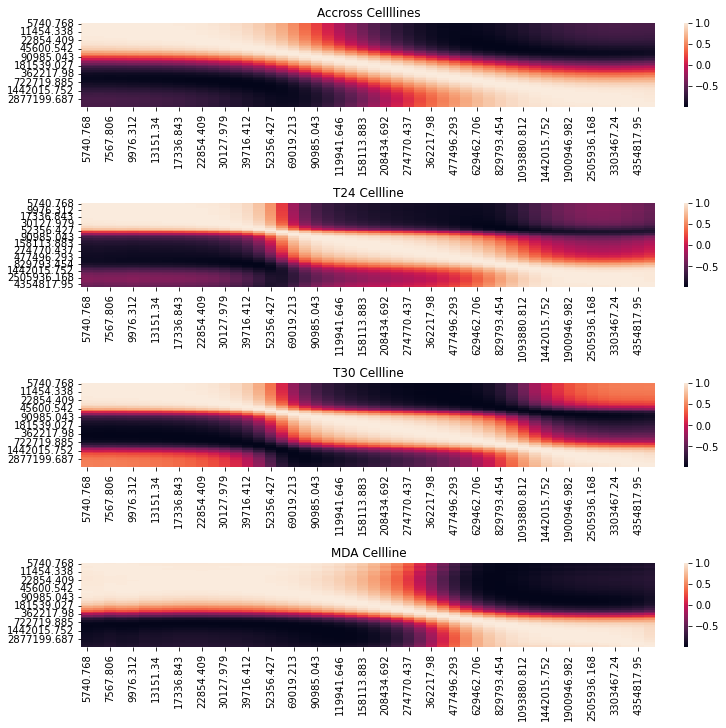

In [25]:
fig,ax = plt.subplots(4,1, figsize=(10,10), constrained_layout=True)
sns.heatmap(df_features.corr(), ax=ax[0])
ax[0].set_title('Accross Cellllines')
sns.heatmap(df_features[df['Zellinie'] == "T24"].corr(), ax=ax[1])
ax[1].set_title('T24 Cellline')
sns.heatmap(df_features[df['Zellinie'] == 'T30'].corr(), ax=ax[2])
ax[2].set_title('T30 Cellline')
sns.heatmap(df_features[df['Zellinie'] == 'MDA'].corr(),ax=ax[3])
ax[3].set_title('MDA Cellline')

### Conclusion Heatmaps
The heatmaps shows that the relation between frequencies and rel impedance is correlated within all experiments of a cellline. Where the same frequencies have similar rel. impedances and different frequencies are inversely correlated.

### 03 Plot Finger Print of Cellline
According to our domain expert each cellline has a impedance fingerprint. The fingerprint we use here is the mean impedance over all experiments of a certain cellline and its corresponding frequency.

Experimentally we try to visualize a fingerprint over different experiments

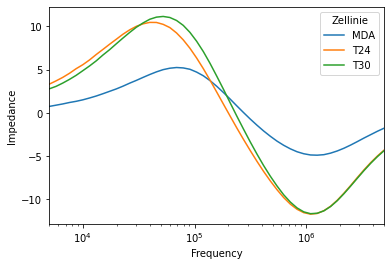

In [26]:
ax = df_mean.T.plot(xlim=(df_mean.columns.min(), df_mean.columns.max()), logx=True, xlabel="Frequency", ylabel="Impedance")

In [27]:
df_mean

5000.000     5740.768     6591.284     7567.806     8689.004     \
Zellinie                                                                    
MDA          0.752178     0.893733     1.036256     1.202944     1.340159   
T24          3.328660     3.701809     4.105319     4.576454     5.111635   
T30          2.786796     3.068340     3.447638     3.873616     4.341568   

          9976.312     11454.338    13151.340    15099.759    17336.843    \
Zellinie                                                                    
MDA          1.512316     1.723420     1.953459     2.217707     2.495756   
T24          5.574259     6.123622     6.750960     7.339581     7.941140   
T30          4.881360     5.426844     6.016870     6.691121     7.311614   

          ...  1442015.752  1655655.607  1900946.982  2182579.161  \
Zellinie  ...                                                       
MDA       ...    -4.829265    -4.652786    -4.400336    -4.084768   
T24       ...   -11.308095   -10.796043   -10.100009    -9.281466   
T30       ...   -11.327816   -10.827915   -10.151707    -9.343213   

          2505936.168  2877199.687  3303467.240  3792887.875  4354817.950  \
Zellinie                                                                    
MDA         -3.717271    -3.317196    -2.903043    -2.512526    -2.121284   
T24         -8.396631    -7.472584    -6.580905    -5.741434    -4.982405   
T30         -8.463596    -7.555768    -6.664000    -5.821935    -5.053657   

          5000000.000  
Zellinie               
MDA         -1.765234  
T24         -4.297315  
T30         -4.364098  

[3 rows x 51 columns]

In [28]:
df_mean.columns.min()

5000.0

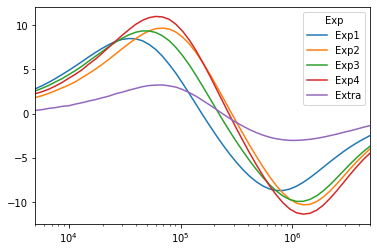

In [30]:
df_mean = df.groupby("Exp").mean()

df_mean.columns = df_mean.columns.astype(float)
ax = df_mean.T.plot(xlim=(df_mean.columns.min(), df_mean.columns.max()), logx=True)

## PCA to Cluster Celllines
A very easy an primitive way to cluster the data is just do get the 1. and 2. PC and color the datapoints according to the celline

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df_features)
pca = PCA(n_components=2)
pca_comp = pca.fit(x)

pca_df = pd.DataFrame(data=pca_comp.transform(x), columns=["PC1", "PC2"])



In [32]:
targets = df_target.unique()
colors = ["r", "g", "b"]

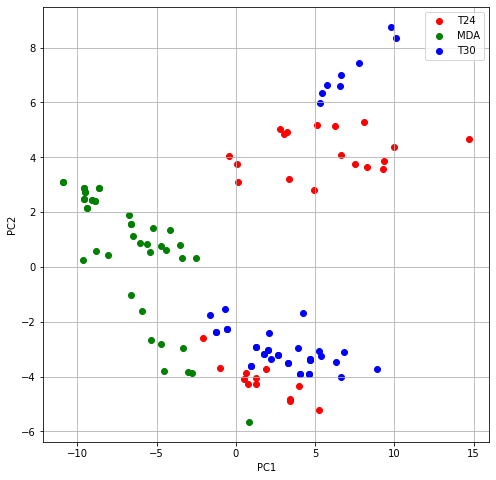

In [33]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
for target, colors in zip(targets, colors):
    ind_to_keep = df_target == target
    ax.scatter(pca_df.loc[ind_to_keep, "PC1"], pca_df.loc[ind_to_keep, "PC2"], c=colors)
ax.legend(targets)
ax.grid()
plt.show()

### TSNE


In [34]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(df_features)
X_embedded.shape

(116, 2)

In [35]:
tsne_df = pd.DataFrame(X_embedded, columns=["TSNE1", "TSNE2"])
targets = df_target.unique()
colors = ["r", "g", "b"]

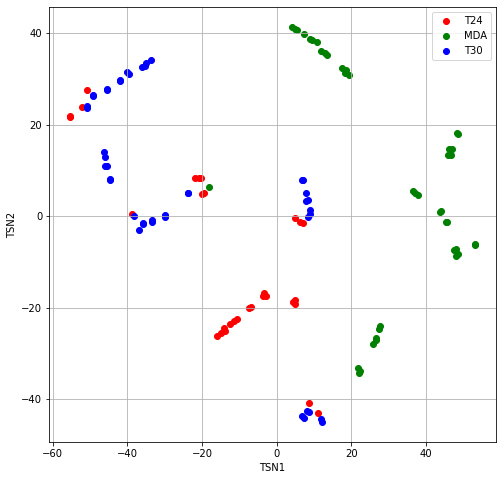

In [36]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("TSN1")
ax.set_ylabel("TSN2")
for target, color in zip(targets, colors):

    ind_to_keep = df_target == target
    ax.scatter(tsne_df.loc[ind_to_keep, "TSNE1"], tsne_df.loc[ind_to_keep, "TSNE2"], c=color)
ax.legend(targets)
ax.grid()
plt.show()

In [ ]:
!pip install fuzzy-c-means

### Clustering as in Paper
The author of the paper first used PCA (3D) to reduce dimensionality and then used fuzzy-c-means to cluster the data. We quickly try to reproduce this.
Edit: here we need to check what was done by the authors exactly, not clear in paper

In [37]:
from fcmeans import FCM

# first reduce dimension
x = StandardScaler().fit_transform(df_features)
pca = PCA(n_components=3)
X = pca.fit_transform(x)


In [38]:
# second use fuzzy c-means
fcm = FCM(n_clusters=3)
fcm.fit(X)


Text(0.5, 1.0, 'Predicted Clustering')

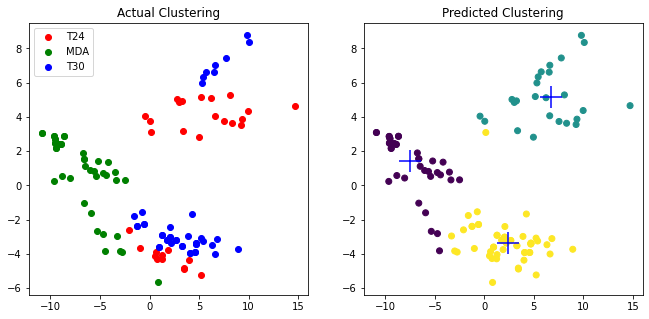

In [40]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
#axes[0].scatter(X[:,0], X[:,1], alpha=1)
for target, color in zip(targets, colors):
    ind_to_keep = df_target == target
    axes[0].scatter(pca_df.loc[ind_to_keep, "PC1"], pca_df.loc[ind_to_keep, "PC2"], c=color)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='b')
axes[0].legend(targets)
axes[0].set_title("Actual Clustering")
axes[1].set_title("Predicted Clustering")